In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv('/workspaces/codespaces-jupyter/Titanic/train.csv')

In [3]:
#making sex column binary
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='female' else 0)

In [4]:
#creating new column relatives
df['relatives']= df['SibSp'] + df['Parch']
df.drop(['SibSp','Parch'],axis = 1,inplace = True)

In [5]:
df['Age'].fillna(0,inplace=True)

In [6]:
y_train = df['Survived']

In [7]:
x_train = df[['Pclass','Sex','Age','Fare','relatives']]

In [8]:
x_train.head(2)

,Pclass,Sex,Age,Fare,relatives
0,3,0,22.0,7.2500,1
1,1,1,38.0,71.2833,1


In [9]:
y_train = np.array(y_train).reshape(-1,1)


In [10]:
x_train = np.array(x_train).reshape(-1,5)
x_train

array([[ 3.    ,  0.    , 22.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , 71.2833,  1.    ],
       [ 3.    ,  1.    , 26.    ,  7.925 ,  0.    ],
       ...,
       [ 3.    ,  1.    ,  0.    , 23.45  ,  3.    ],
       [ 1.    ,  0.    , 26.    , 30.    ,  0.    ],
       [ 3.    ,  0.    , 32.    ,  7.75  ,  0.    ]])

In [11]:
#spitting x_train and y_train into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.2,random_state = 0)

In [14]:
x_train.shape

(712, 5)

In [15]:
y_train.shape

(712, 1)

In [49]:
## Implementing knn from scratch
def knn(X_train, y_train, X_test, k, distance='euclidean'):
    """
    X_train: training data
    y_train: training labels
    X_test: test data
    k: number of nearest neighbors
    """
    # number of test samples
    n_test = X_test.shape[0]
    # number of training samples
    n_train = X_train.shape[0]
    # initialize y_pred
    y_pred = np.zeros(n_test)
    # loop over all test samples
    for i in range(n_test):
        # compute L2 distance between the i-th test sample and all training samples
        if distance == 'euclidean':
            distances = np.sqrt(np.sum(np.square(X_train - X_test[i, :]), axis=1))
        elif distance == 'manhattan':
            distances = np.sum(np.abs(X_train - X_test[i, :]), axis=1)
        elif distance == 'cosine':
            distances = np.sum(np.abs(X_train * X_test[i, :]), axis=1) / (np.sqrt(np.sum(np.square(X_train), axis=1)) * np.sqrt(np.sum(np.square(X_test[i, :]))))
        elif distance == 'jaccard':
            distances = np.sum(np.abs(X_train - X_test[i, :]), axis=1) / (np.sum(np.abs(X_train + X_test[i, :]), axis=1))
        else:
            raise ValueError('Unknown distance metric %s' % distance)
        # sort the distances and return the indices of the first k neighbors
        k_nearest_neighbors = np.argsort(distances)[:k]
        # majority vote
        y_pred[i] = np.argmax(np.bincount(y_train[k_nearest_neighbors].astype('int')))
    return y_pred


In [52]:
def get_results(k, dist):
    pred = knn(x_train,y_train.flatten(),x_test,k,dist)
    acc = np.sum(pred == y_test.flatten())/len(y_test)
    print(f'Accuracy: {acc*100}%')
    conf_mat = pd.DataFrame(columns = ['Predicted 0','Predicted 1'],index = ['Actual 0','Actual 1'], data = [[0,0],[0,0]])
    predicted = pred
    for i in range(len(y_test)):
        if y_test[i][0] == 0:
            if predicted[i] == 0:
                conf_mat.iloc[0,0] += 1
            else:
                conf_mat.iloc[0,1] += 1
        else:
            if predicted[i] == 0:
                conf_mat.iloc[1,0] += 1
            else:
                conf_mat.iloc[1,1] += 1
    sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')

Accuracy: 69.83240223463687%


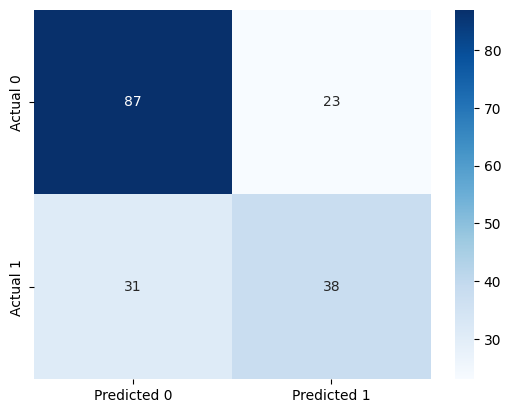

In [53]:
get_results(1, 'euclidean')

Accuracy: 72.62569832402235%


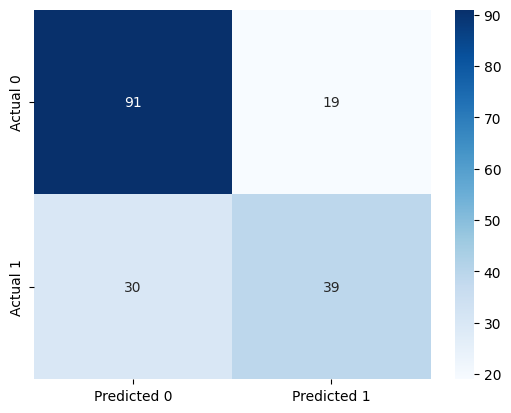

In [54]:
get_results(1, 'manhattan')

Accuracy: 60.33519553072626%


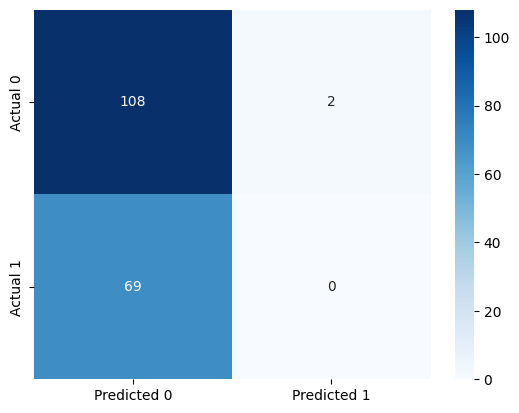

In [55]:
get_results(1, 'cosine')

Accuracy: 72.06703910614524%


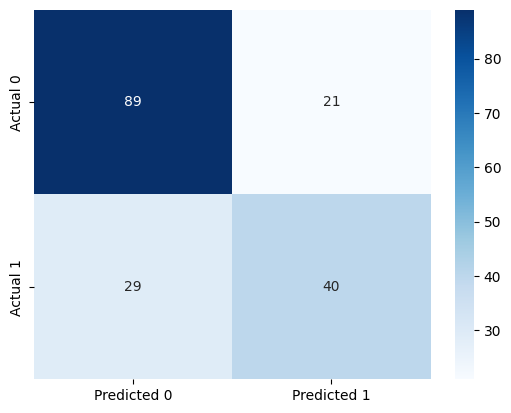

In [56]:
get_results(1, 'jaccard')

Accuracy: 68.15642458100558%


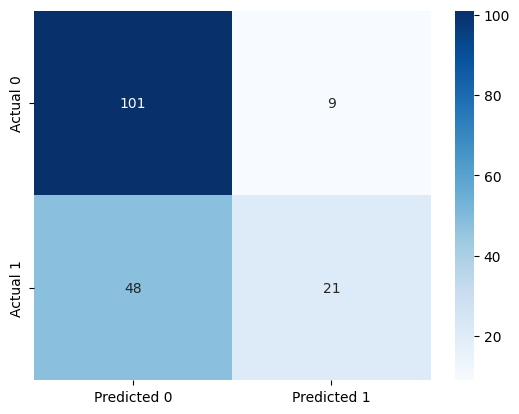

In [57]:
get_results(2, 'euclidean')

Accuracy: 70.94972067039106%


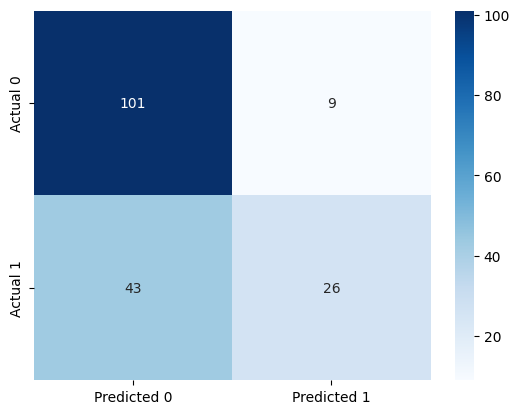

In [58]:
get_results(2, 'manhattan')

Accuracy: 60.33519553072626%


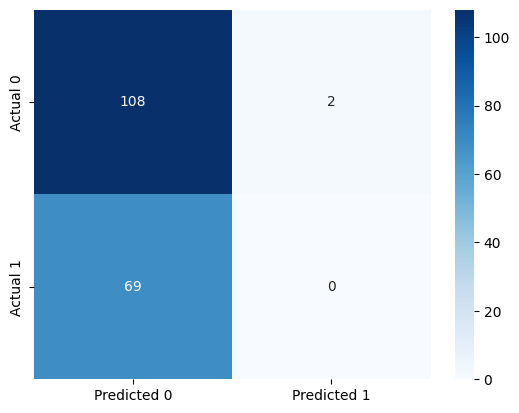

In [59]:
get_results(2, 'cosine')

Accuracy: 69.27374301675978%


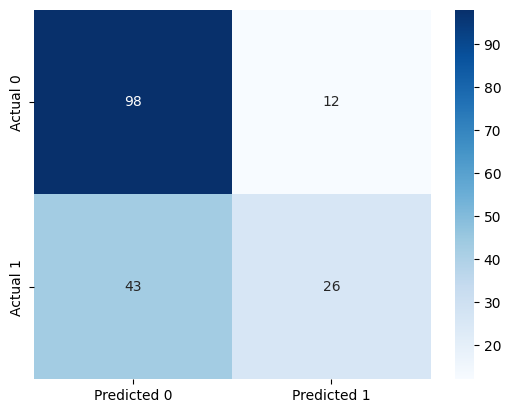

In [60]:
get_results(2, 'jaccard')

Accuracy: 69.27374301675978%


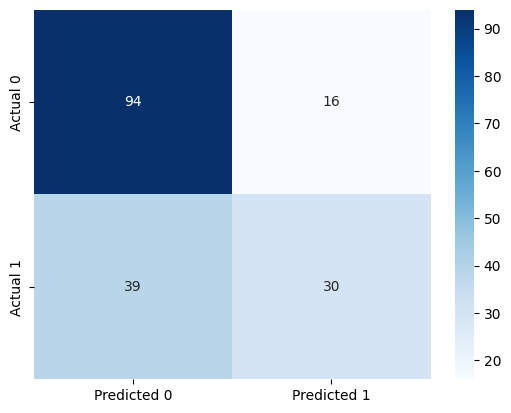

In [61]:
get_results(3, 'euclidean')

Accuracy: 76.53631284916202%


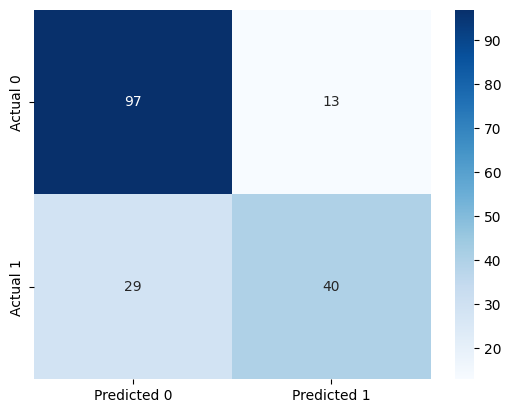

In [62]:
get_results(3, 'manhattan')

Accuracy: 60.33519553072626%


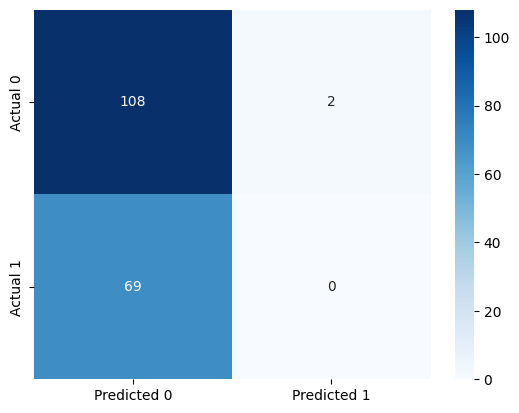

In [63]:
get_results(3, 'cosine')

Accuracy: 74.86033519553072%


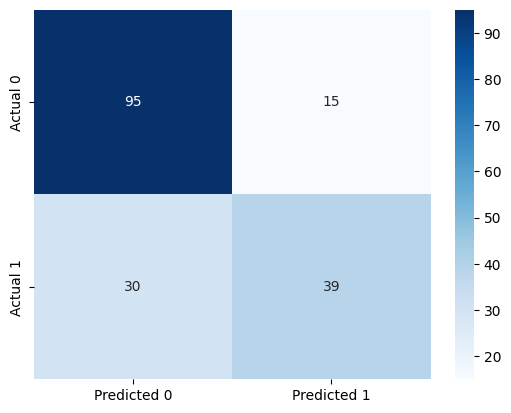

In [64]:
get_results(3, 'jaccard')

In [35]:
#######################################################
######################################################

Accuracy:  80.44692737430168 %


<AxesSubplot: >

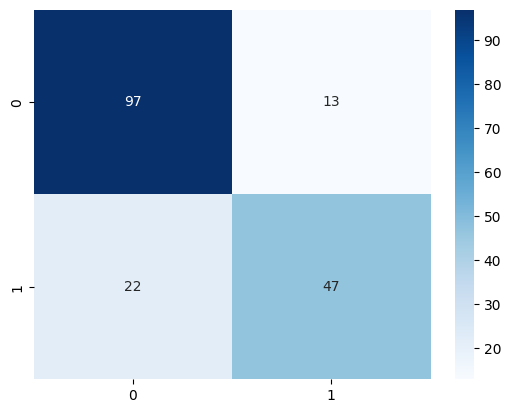

In [36]:
## Implementing decision trees using sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('Accuracy: ',accuracy_score(y_test,y_pred)*100,'%')
conf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
